In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer


In [6]:
data = pd.read_csv("D:\\Downloads\\melb_data.csv\\melb_data.csv")
data=data.drop(["Suburb","SellerG","Address","Postcode","Date"], axis=1)
print(data.isnull().sum())
data.describe()

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['Car'] = data['Car'].fillna(data['Car'].median())
new_data=data
print(new_data.isnull().sum())

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [18]:
le = LabelEncoder()

new_data['Type'] = le.fit_transform(new_data['Type'])
new_data['Method'] = le.fit_transform(new_data['Method'])
new_data['CouncilArea'] = le.fit_transform(new_data['CouncilArea'])
new_data['Regionname'] = le.fit_transform(new_data['Regionname'])

imputer = SimpleImputer()
new_data_imputed = pd.DataFrame(imputer.fit_transform(new_data), columns=new_data.columns)
new_data = new_data_imputed
print(new_data.isnull().sum())
print(new_data.head())

Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64
   Rooms  Type      Price  Method  Distance  Bedroom2  Bathroom  Car  \
0    2.0   0.0  1480000.0     1.0       2.5       2.0       1.0  1.0   
1    2.0   0.0  1035000.0     1.0       2.5       2.0       1.0  0.0   
2    3.0   0.0  1465000.0     3.0       2.5       3.0       2.0  0.0   
3    3.0   0.0   850000.0     0.0       2.5       3.0       2.0  1.0   
4    4.0   0.0  1600000.0     4.0       2.5       3.0       1.0  2.0   

   Landsize  BuildingArea    YearBuilt  CouncilArea  Lattitude  Longtitude  \
0     202.0     151.96765  1964.684217         31.0   -37.7996    144.9984   
1     156.0      79.00000  1900.000000         31.0   -37.8079    144.9934   
2     134.0     

In [20]:
housing_numeric=new_data.columns
cor = new_data[housing_numeric].corr()
print(cor)


                  Rooms      Type     Price    Method  Distance  Bedroom2  \
Rooms          1.000000 -0.554141  0.496634 -0.051368  0.294203  0.944190   
Type          -0.554141  1.000000 -0.414566  0.078432 -0.234845 -0.533994   
Price          0.496634 -0.414566  1.000000 -0.037741 -0.162522  0.475951   
Method        -0.051368  0.078432 -0.037741  1.000000 -0.052316 -0.049553   
Distance       0.294203 -0.234845 -0.162522 -0.052316  1.000000  0.295927   
Bedroom2       0.944190 -0.533994  0.475951 -0.049553  0.295927  1.000000   
Bathroom       0.592934 -0.231465  0.467038 -0.003509  0.127155  0.584685   
Car            0.407843 -0.273001  0.238637 -0.022423  0.262074  0.404721   
Landsize       0.025678 -0.017725  0.037507  0.018041  0.025004  0.025646   
BuildingArea   0.091373 -0.052744  0.069570 -0.008783  0.073990  0.089102   
YearBuilt     -0.052112  0.270223 -0.262144  0.024497  0.193183 -0.041894   
CouncilArea   -0.054428 -0.004047 -0.063653  0.025644 -0.084354 -0.045426   

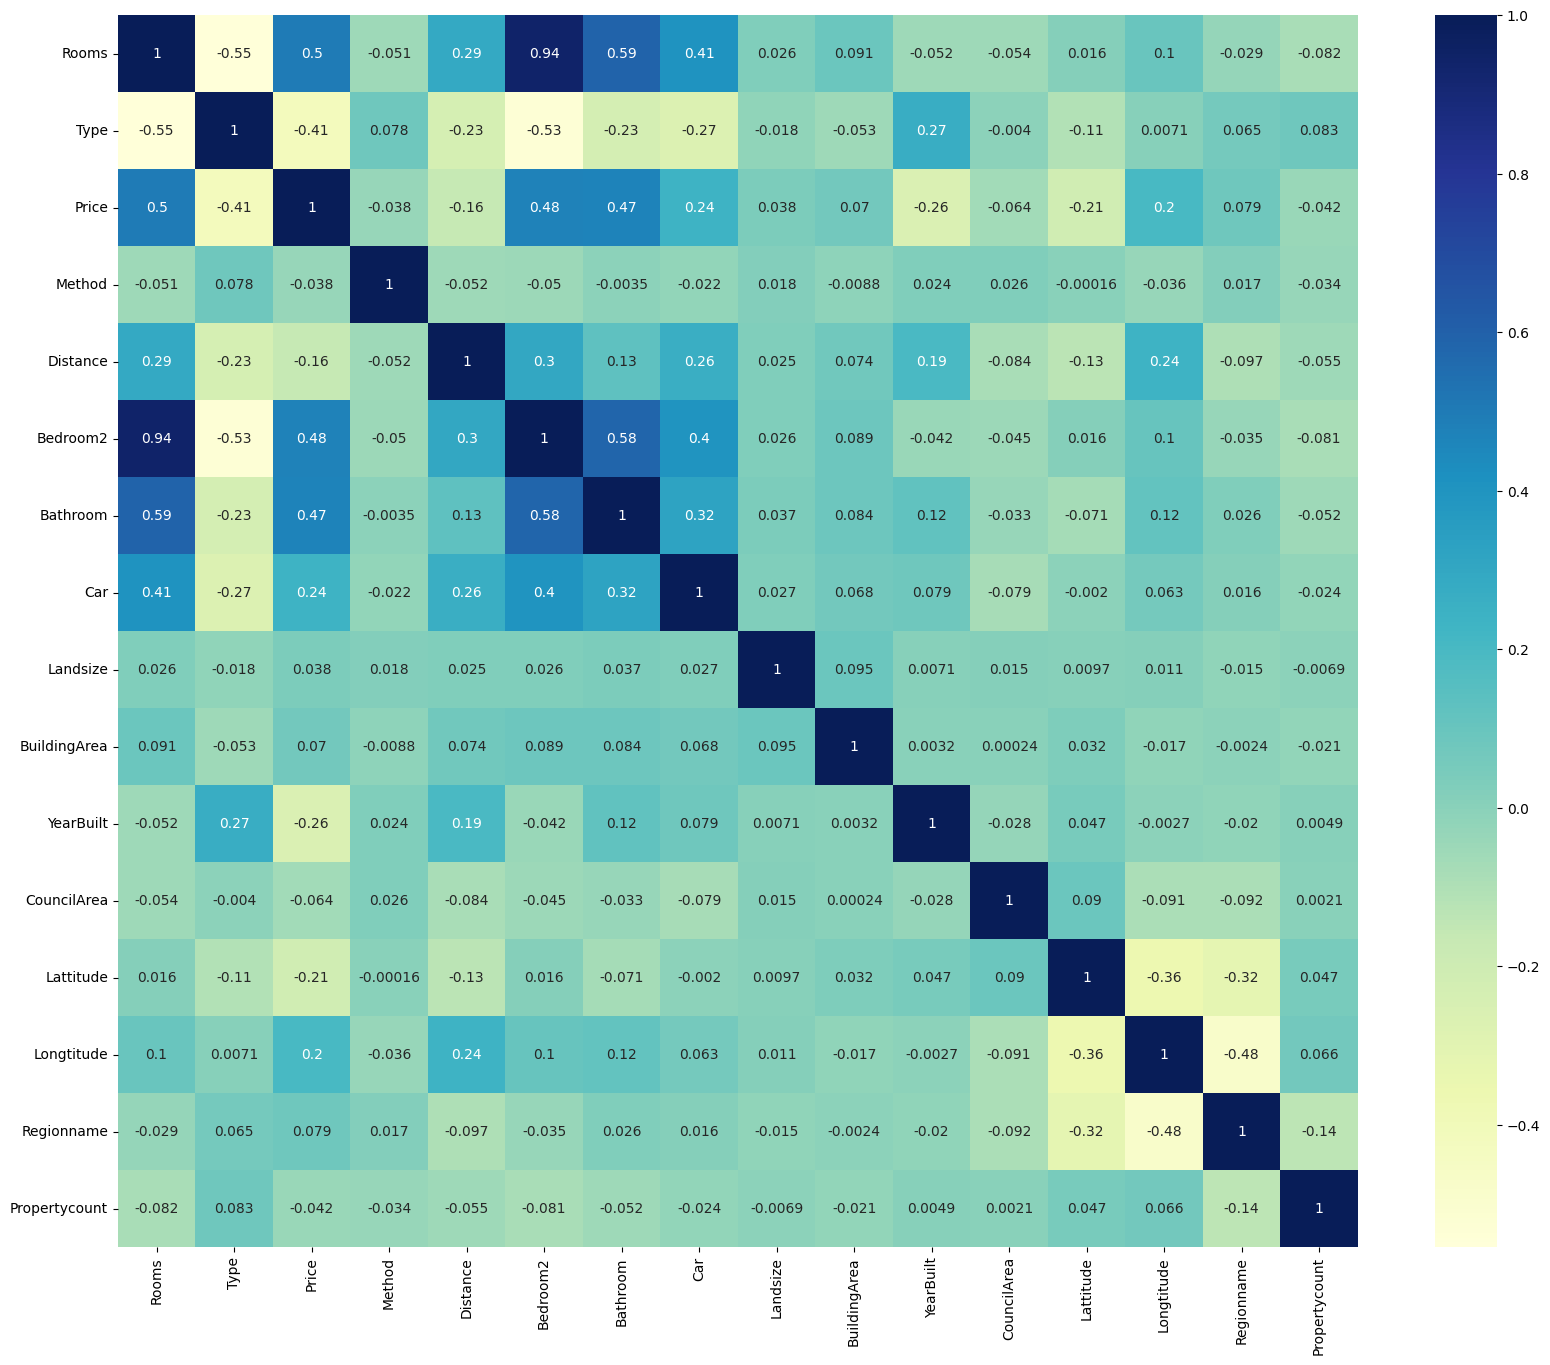

In [31]:
plt.figure(figsize=(20, 16))
sns.heatmap(new_data[housing_numeric].corr(),cmap='YlGnBu', annot=True)
plt.show()


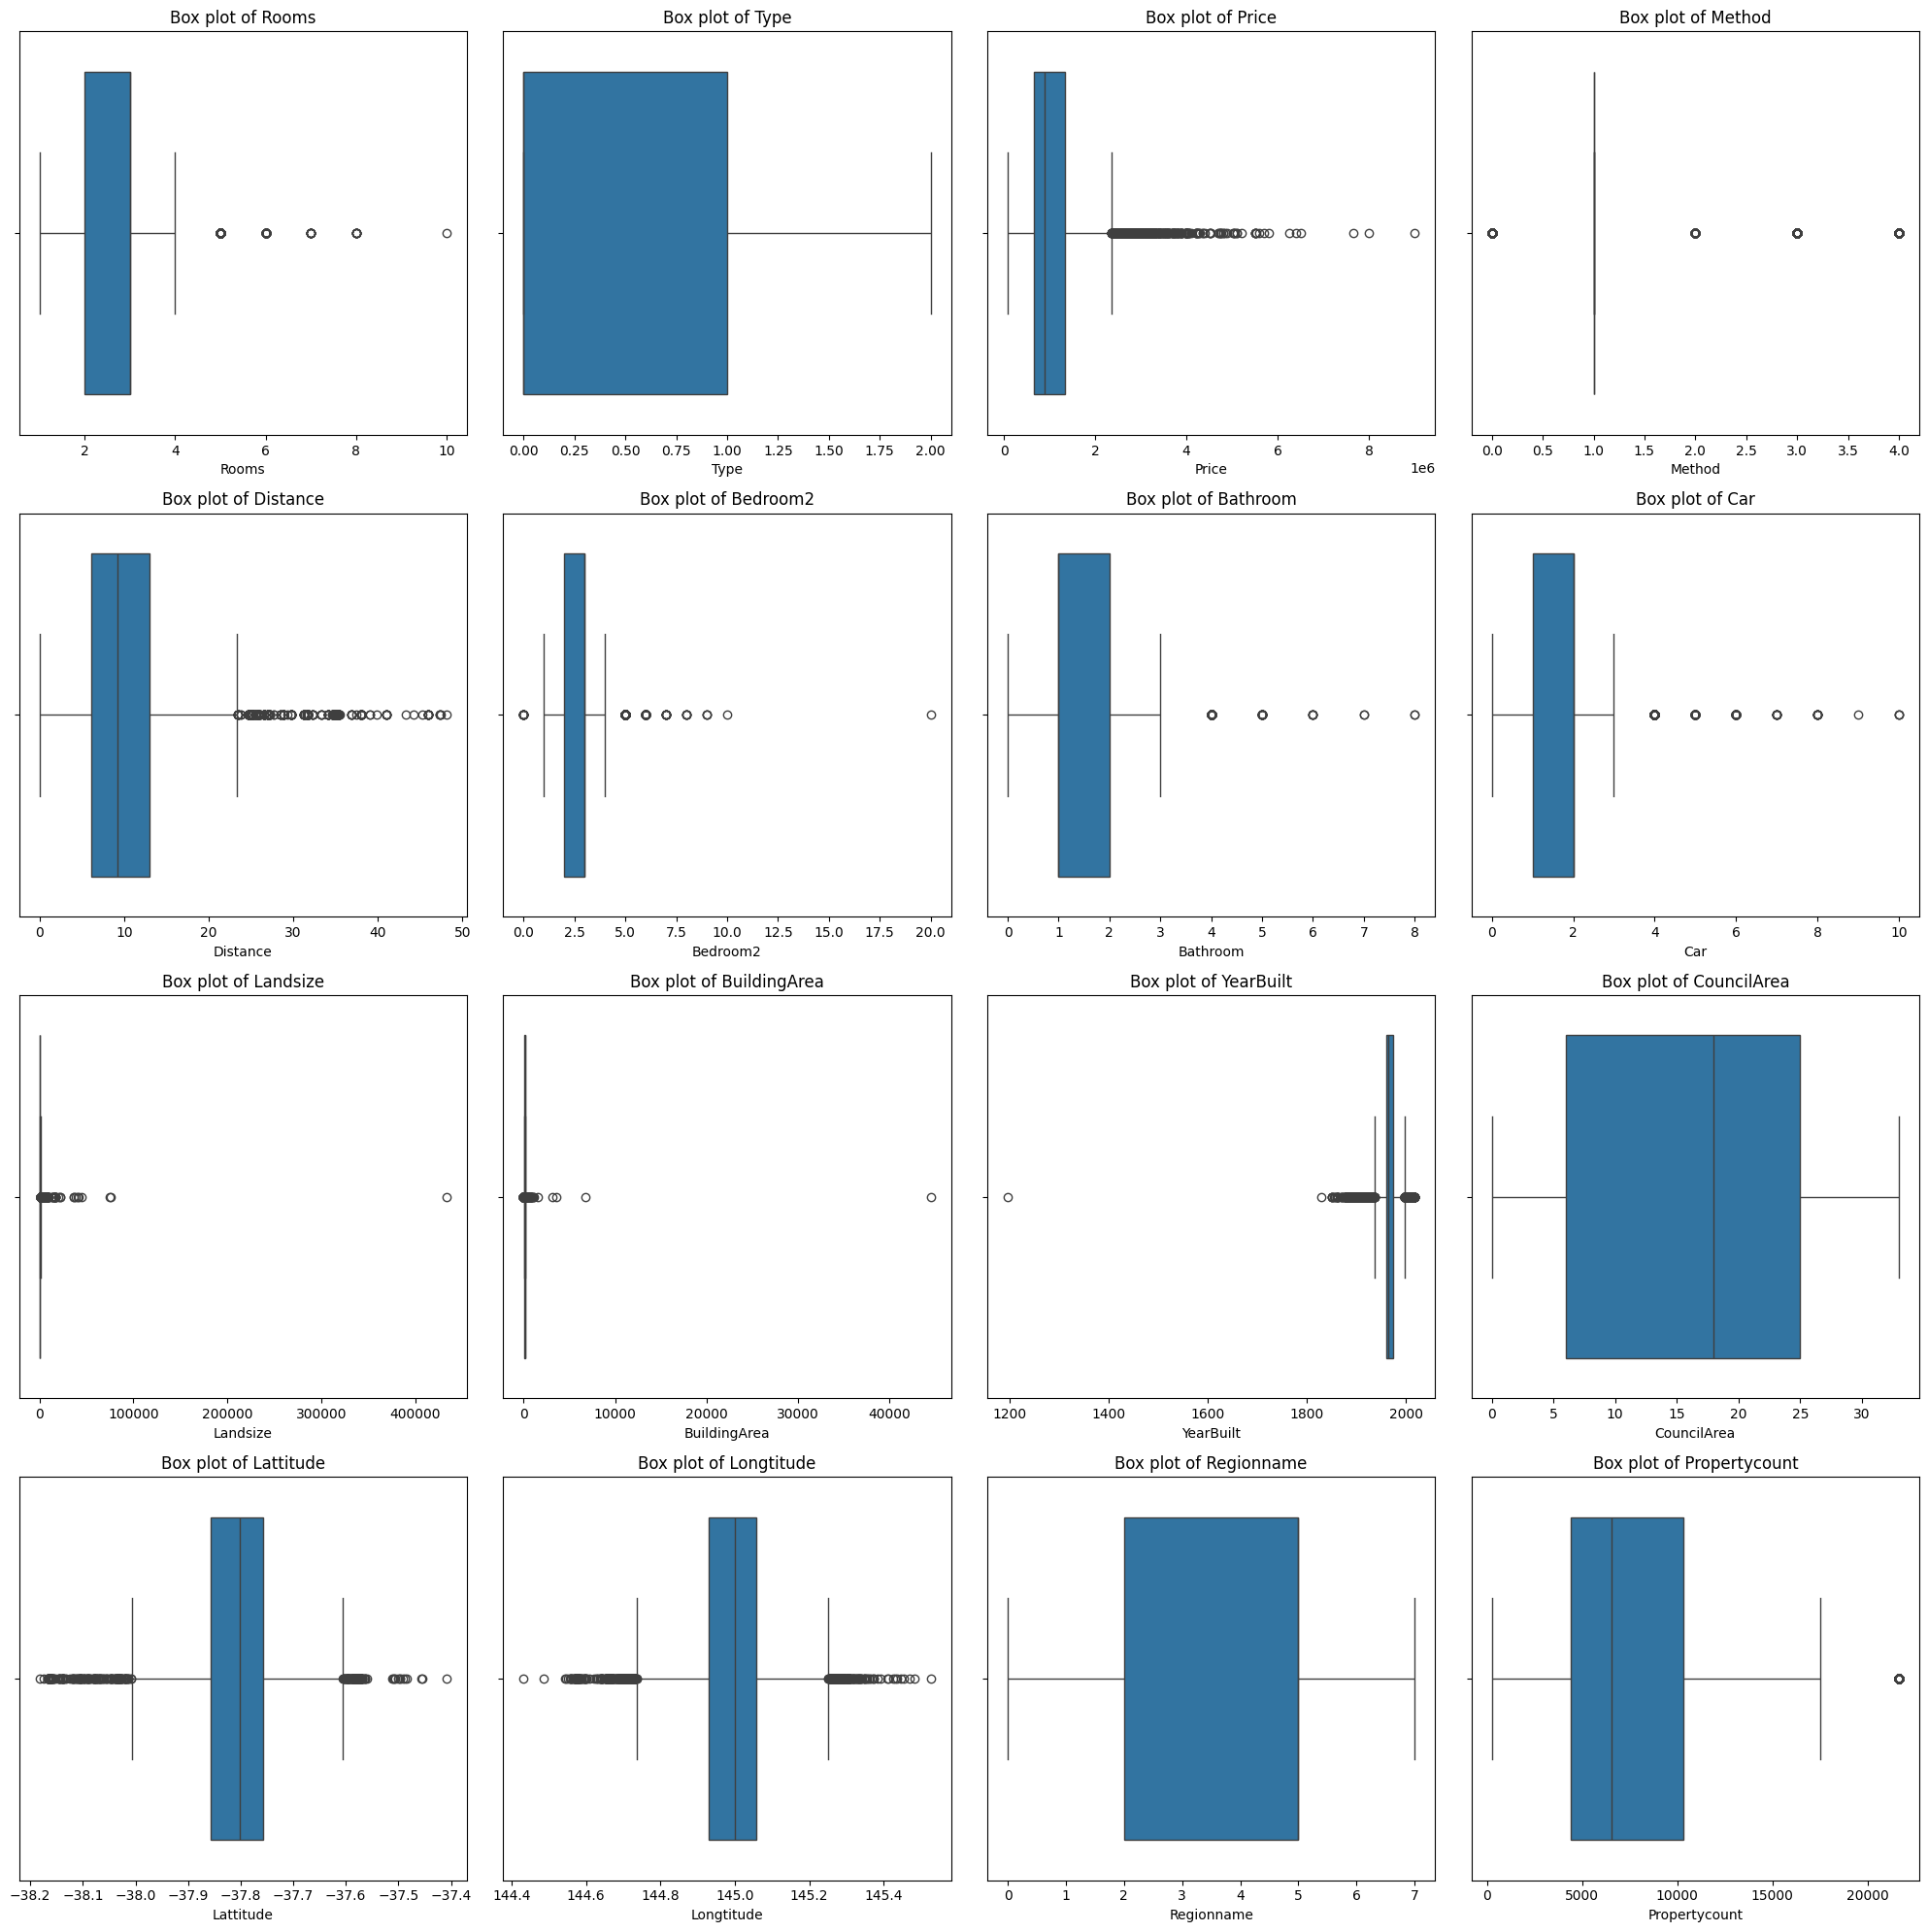

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  
axes = axes.flatten()

for ax, col in zip(axes, new_data.columns):
    sns.boxplot(x=new_data[col], ax=ax)
    ax.set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [23]:
def detect_outliers(data, columns):
    for col in columns:
        z_scores = (data[col] - data[col].mean()) / data[col].std()
        z_scores.index = data.index  
        data = data[(z_scores.abs() <= 3)]
    return data

columns_to_clean = new_data.columns

data_clean = detect_outliers(new_data, columns_to_clean)

X = data_clean.drop(["Price"], axis=1)
Y = data_clean["Price"]



In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    print(name)
    print("  Mean Squared Error (MSE):", mse)
    print("  R-squared (R2):", r2)
    print("  Mean Absolute Error (MAE):", mae)



Linear Regression
  Mean Squared Error (MSE): 95874852514.4549
  R-squared (R2): 0.6642525275826859
  Mean Absolute Error (MAE): 230828.02104756853
Decision Tree
  Mean Squared Error (MSE): 93328312650.21423
  R-squared (R2): 0.673170343885974
  Mean Absolute Error (MAE): 204277.1879111842
Random Forest
  Mean Squared Error (MSE): 46493869738.55369
  R-squared (R2): 0.8371815044485651
  Mean Absolute Error (MAE): 146436.13020285088
Support Vector Regression
  Mean Squared Error (MSE): 306819215481.9922
  R-squared (R2): -0.07446085584967022
  Mean Absolute Error (MAE): 411597.04302516824
Ridge Regression
  Mean Squared Error (MSE): 95919184274.12146
  R-squared (R2): 0.6640972806554104
  Mean Absolute Error (MAE): 230736.04931535228
Lasso Regression
  Mean Squared Error (MSE): 95875192709.96211
  R-squared (R2): 0.664251336240236
  Mean Absolute Error (MAE): 230827.50636088438
K-Nearest Neighbors
  Mean Squared Error (MSE): 125369588815.05307
  R-squared (R2): 0.5609638872059197
  Mean

In [25]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [26]:
best_model.fit(X_train, Y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
print("Best Model Evaluation")
print("  Mean Squared Error (MSE):", mse)
print("  R-squared (R2):", r2)
print("  Mean Absolute Error (MAE):", mae)

Best Model Evaluation
  Mean Squared Error (MSE): 41574965077.6008
  R-squared (R2): 0.8544071873431248
  Mean Absolute Error (MAE): 138135.46921900698


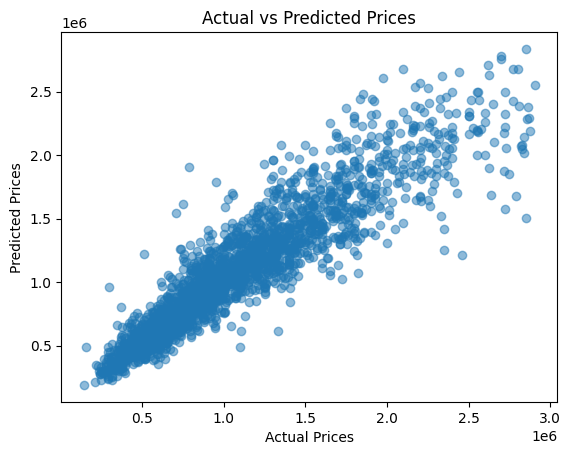

In [27]:
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [28]:
def predict_price():
    Rooms = int(input("Enter the number of Rooms: "))
    Type = input("Enter the Type: ")
    Method = input("Enter the Method: ")
    Distance = float(input("Enter the Distance: "))
    Bedroom2 = int(input("Enter the number of Bedroom2: "))
    Bathroom = int(input("Enter the number of Bathroom: "))
    Car = int(input("Enter the number of Car: "))
    Landsize = float(input("Enter the Landsize: "))
    BuildingArea = float(input("Enter the BuildingArea: "))
    YearBuilt = int(input("Enter the YearBuilt: "))
    CouncilArea = input("Enter the CouncilArea: ")
    Lattitude = float(input("Enter the Lattitude: "))
    Longtitude = float(input("Enter the Longtitude: "))
    Regionname = input("Enter the Regionname: ")
    Propertycount = int(input("Enter the Propertycount: "))


    input_df = pd.DataFrame({
        'Rooms': [Rooms],
        'Type': [Type],
        'Method': [Method],
        'Distance': [Distance],
        'Bedroom2': [Bedroom2],
        'Bathroom': [Bathroom],
        'Car': [Car],
        'Landsize': [Landsize],
        'BuildingArea': [BuildingArea],
        'YearBuilt': [YearBuilt],
        'CouncilArea': [CouncilArea],
        'Lattitude': [Lattitude],
        'Longtitude': [Longtitude],
        'Regionname': [Regionname],
        'Propertycount': [Propertycount]
    })

    print("\nInput Values:")
    print("----------------")
    print(input_df.to_string(index=False))

    le = LabelEncoder()
    input_df['Type'] = le.fit_transform(input_df['Type'])
    input_df['Method'] = le.fit_transform(input_df['Method'])
    input_df['CouncilArea'] = le.fit_transform(input_df['CouncilArea'])
    input_df['Regionname'] = le.fit_transform(input_df['Regionname'])


    predicted_price = best_model.predict(input_df)
    
    print("Predicted Price: ", predicted_price[0])

predict_price()


Input Values:
----------------
 Rooms Type Method  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude            Regionname  Propertycount
     3    h     SP       2.5         3         2    0     134.0         150.0       1900       Yarra   -37.8079    144.9944 Northern Metropolitan           4019
Predicted Price:  1186358.1
